# <div align='center'>K-Nearest Neighbors</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

In [2]:
class K_Nearest_Neighbors():
    
    def __init__(self,X,y,k,d_type,p=None):
        
        self.X = X
        self.y = y.reshape(-1,1)
        self.K = k
        self.d_type = d_type
        self.p = p
        
    def distance_Metric(self,test_data):
        
        distance = 0
        
        if(self.d_type == 'euclidean_dist'):
            
            # Alternate way to implement: np.linalg.norm((self.X - test_data), axis=1).reshape(-1,1)
            distance = np.sqrt(np.sum(np.square(self.X - test_data), axis=1)).reshape(-1,1)
            
        elif(self.d_type == 'manhattan_dist'):
            
            distance = np.sum(np.abs(self.X - test_data), axis=1).reshape(-1,1)
        
        elif(self.d_type == 'minkowski_dist'):
        
            distance = (np.sum((np.abs(self.X - test_data)**self.p), axis=1)**(1/self.p)).reshape(-1,1)
        
        return distance
        
    def get_k_neighbors(self,test_data):
        
        # Calculate the distance
        distance = self.distance_Metric(test_data)
            
        # Horizontally stack the distance and self.y array
        dataframe = np.hstack((distance,self.y))
            
        # Convert to a pandas dataframe 
        dataframe = pd.DataFrame(dataframe,columns=["Distance","y_hat"])
            
        # Sort the dataframe based on distance
        dataframe = dataframe.sort_values('Distance')
            
        # get the k closest neighbors
        k_neighbors = dataframe.head(self.K)
            
        return k_neighbors
            
    def predict(self,X_test):
        
        y_hat = []
        
        for row in X_test:
            
            test_data = np.array([row]*self.X.shape[0]).reshape(self.X.shape)
            
            # Find the k closest neighbors
            k_neighbors = self.get_k_neighbors(test_data)
            
            # Append the prediction to y_hat
            y_hat.append(k_neighbors["y_hat"].mode().tolist()[0])
            
        y_hat = np.array(y_hat).reshape(-1,1)
        
        return y_hat
    
    def calc_Accuracy(self,X_test,y_test):
        
        n_samples = y_test.shape[0]
        y_test = y_test.reshape(-1,1)
        y_hat = self.predict(X_test)
  
        accuracy = np.sum(y_hat == y_test)/n_samples
        
        return accuracy

In [3]:
# Dataset from sklearn
Data_X, Data_y = make_blobs(n_samples=100,centers=3, n_features=2,cluster_std=1,random_state=0)

split_ratio = 75

# Training Set
X_train, y_train = Data_X[:split_ratio,:],Data_y[:split_ratio]

# Testing Set
X_test, y_test = Data_X[split_ratio:,:],Data_y[split_ratio:]

In [4]:
clf = K_Nearest_Neighbors(X_train,y_train,5,'minkowski_dist',3)
print("Accuracy : {}%".format(clf.calc_Accuracy(X_test,y_test)*100))

Accuracy : 96.0%


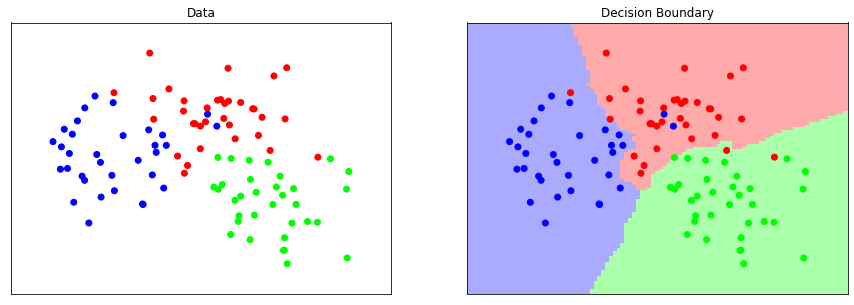

In [5]:
# Visualizing K-Nearest Neighbors

fig, ax = plt.subplots(1, 2,figsize=(15,5))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



x_min, x_max = Data_X[:, 0].min() - 1, Data_X[:, 0].max() + 1
y_min, y_max = Data_X[:, 1].min() - 1, Data_X[:, 1].max() + 1

ax[0].scatter(Data_X[:, 0], Data_X[:, 1], c=Data_y, cmap=cmap_bold)
ax[0].set_title('Data')
ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[0].set_xticks([])
ax[0].set_yticks([])

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = np.array(Z).reshape(xx.shape)


ax[1].pcolormesh(xx, yy, Z, cmap=cmap_light)
ax[1].scatter(Data_X[:, 0], Data_X[:, 1], c=Data_y, cmap=cmap_bold)
ax[1].set_title('Decision Boundary')
ax[1].set_xticks([])
ax[1].set_yticks([])


plt.show()